## UTILITIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict


In [ ]:
from tqdm import tqdm

In [ ]:
X_train= np.load('X_train_dft1.npy')
X_test= np.load('X_test_dft1.npy')

In [ ]:
X_train = np.squeeze(X_train)

In [ ]:
X_test = np.squeeze(X_test)


In [ ]:
X_train.shape

(1828, 64)

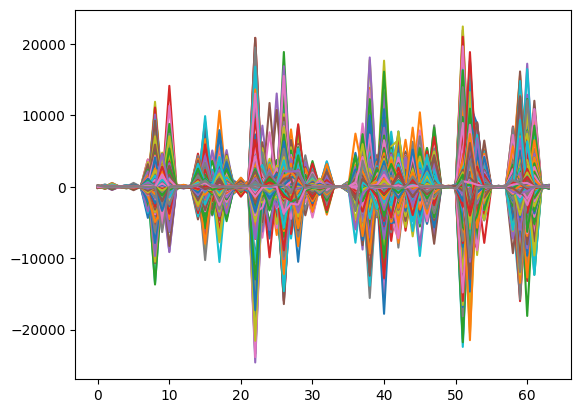

In [ ]:
plt.plot(X_train.reshape(X_train.shape[1], X_train.shape[0]))
plt.show()

In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 20.3 MB/s eta 0:00:00


In [ ]:
import tslearn


## TIME SERIES K-MEANS

In [ ]:
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
km = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=5, random_state=0)
km.fit(X_train)

TimeSeriesKMeans(max_iter=5, metric='dtw', n_clusters=6, random_state=0)

In [ ]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

In [ ]:
km.cluster_centers_.shape


(6, 64, 1)

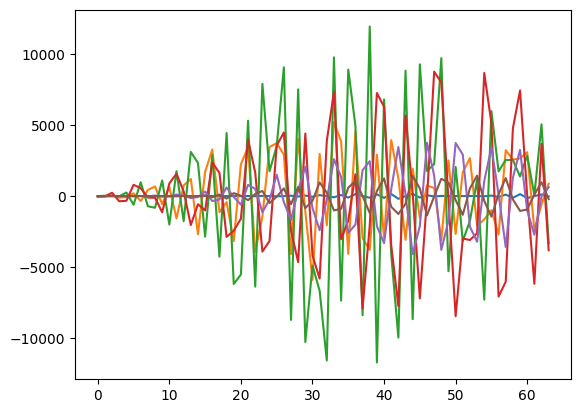

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
km.inertia_

29715199.133956842

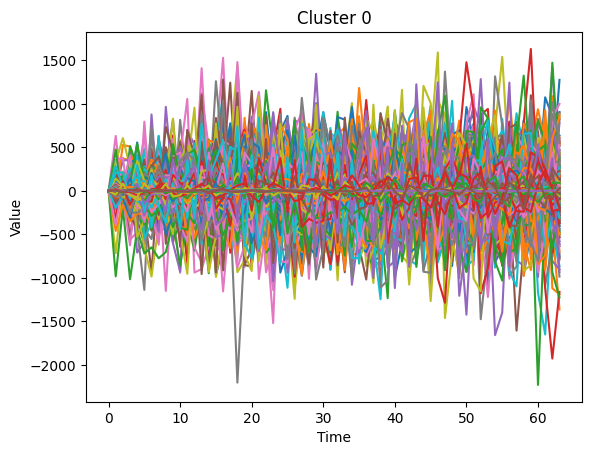

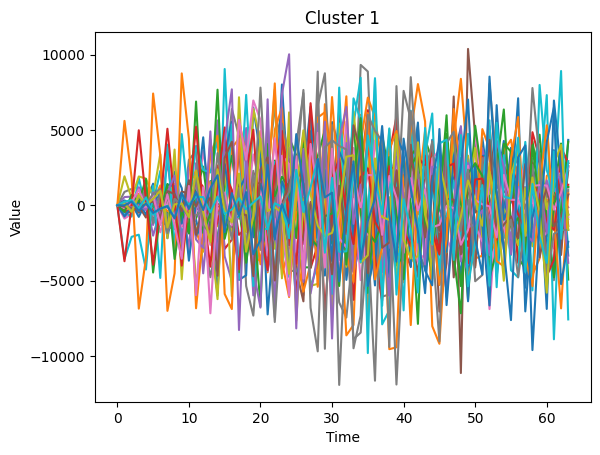

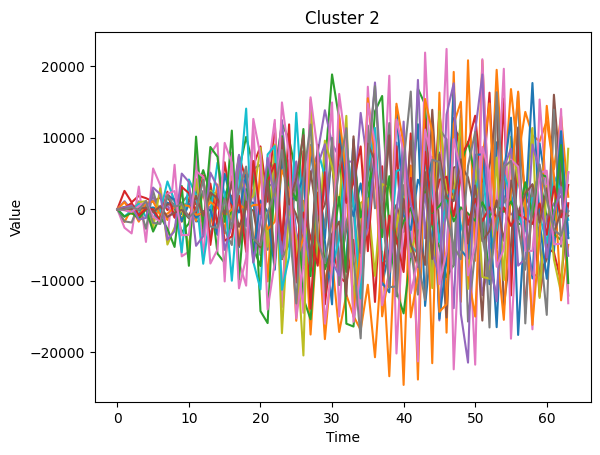

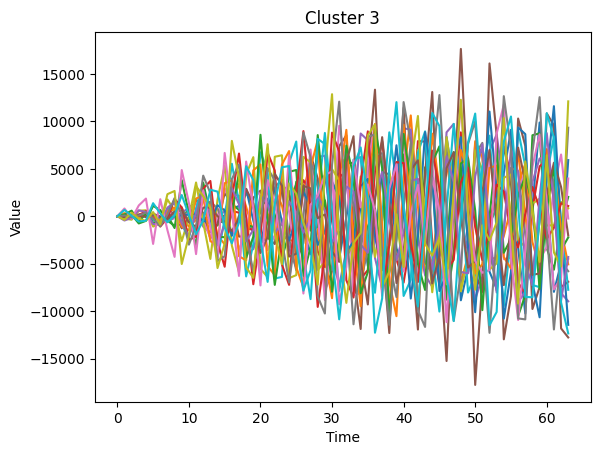

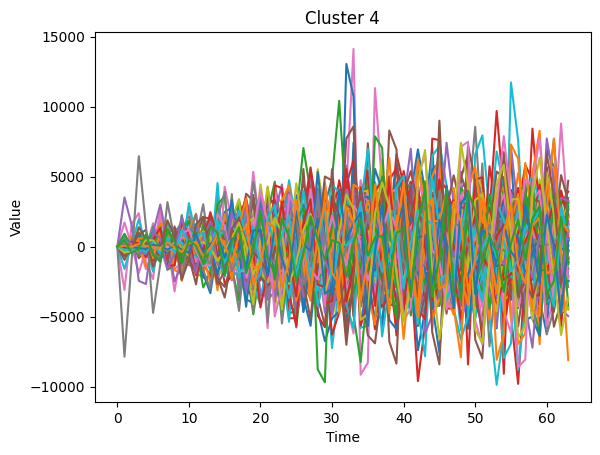

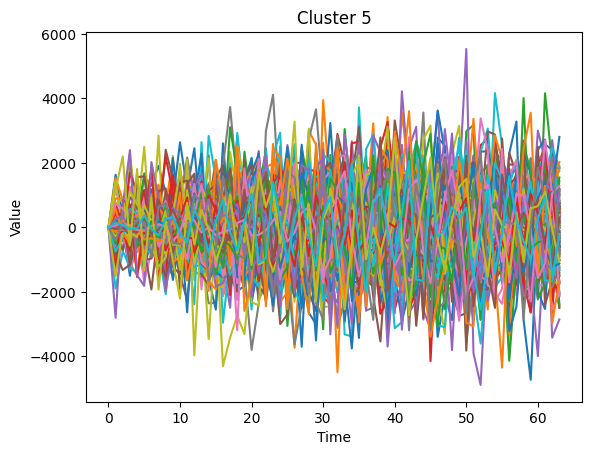

In [ ]:
labels = km.labels_

# Plot and save each cluster separately
for cluster_id in range(km.n_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]

    # Create a new figure for each cluster
    plt.figure()

    # Plot the time series in the current cluster
    for i in cluster_indices:
        plt.plot(X_train[i], label=f"Time Series {i}")

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Cluster {cluster_id}")

    # Save the figure with a unique filename for each cluster
    plt.savefig(f"cluster_{cluster_id}.png")

    # Show the figure
    plt.show()

    # Close the current figure to release memory
    plt.close()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
from tslearn.metrics import dtw

In [ ]:
km.cluster_centers_.shape

(6, 64, 1)

In [ ]:
silhouette_avg = silhouette_score(X_train, labels, metric=dtw)
print("Silhouette Score:", silhouette_avg)

distances = pairwise_distances_argmin_min(X_train, np.squeeze(km.cluster_centers_))
sse = np.sum(distances[1])
print("SSE:", sse)

Silhouette Score: 0.6693446265815928
SSE: 7223357.527467879


Clustering progress: 100%|██████████| 9/9 [33:21<00:00, 222.42s/it]


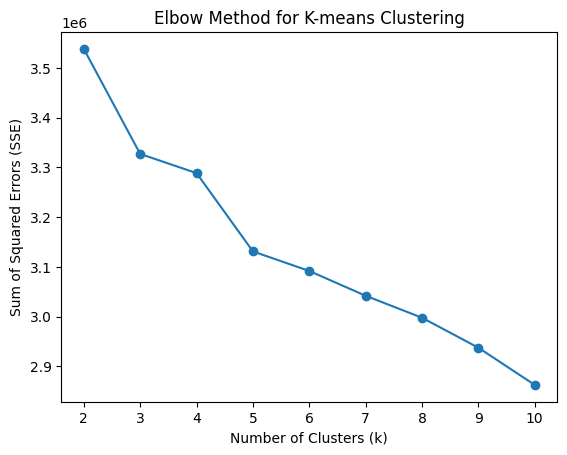

In [ ]:
k_values = range(2, 11)
sse_values = []

for k in tqdm(k_values, desc="Clustering progress"):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=10, random_state=42)
    kmeans.fit(X_train.T)
    distances = pairwise_distances_argmin_min(X_train.T, np.squeeze(kmeans.cluster_centers_))
    sse = np.sum(distances[1])

    sse_values.append(sse)

# Plot SSE vs. number of clusters
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for K-means Clustering')
plt.show()

In [ ]:
X_train= np.load('X_train_sax3.npy')
X_test= np.load('X_test_sax3.npy')

In [ ]:
X_train = np.squeeze(X_train)

In [ ]:
X_test = np.squeeze(X_test)

In [ ]:
km = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=5, random_state=0)
km.fit(X_train)

In [ ]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
labels = km.labels_

for cluster_id in range(km.n_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]

    plt.figure()

    for i in cluster_indices:
        plt.plot(X_train[i], label=f"Time Series {i}")

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Cluster {cluster_id}")

    plt.savefig(f"cluster_{cluster_id}.png")

    plt.show()

    plt.close()

In [ ]:
silhouette_avg = silhouette_score(X_train, labels, metric=dtw)
print("Silhouette Score:", silhouette_avg)

distances = pairwise_distances_argmin_min(X_train, np.squeeze(km.cluster_centers_))
sse = np.sum(distances[1])
print("SSE:", sse)

In [ ]:
Y_train = pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')

In [ ]:
Y_train['labels'] = labels

In [ ]:
Y_train

In [ ]:
grouped_single= Y_train.groupby('labels')

In [ ]:
grouped_single.head()